In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import randint


In [2]:

#criação da matriz Q(s,a)
def gerar_Qsa (n_truck, n_CD,n_actions):
    
    Q_sa = {}
    for i in range(1,n_truck+1):
     #   for j in range(1,n_CD+1):
       #     Q_sa[(i,j)] = np.zeros(n_actions)
     Q_sa[i] = np.zeros(n_actions)   
    return Q_sa

#definição das caracteristicas do agente (caminhão): quant. Budweiser, quanti. Corona, percurso total, trajeto
agent_truck = {1:[20,0,0,0], 2:[0,20,0,0], 3:[20,0,0,0], 4:[0,20,0,0], 5:[10,10,0,0], 6:[10,10,0,0], 7:[20,0,0,0], 8:[0,20,0,0]}
n_agent = 8

#açoes que o agente pdode executar
#vet_action = [1,2,3,4]
n_actions = 4
n_CD = 4

# Recompensas (rota ruim, rota boa, rota otimizada)       
Reward = [-10, 0, 100]

#Distância de cada Cd
CD_dist = {1:100, 2: 120, 3:140, 4:160}

Q = gerar_Qsa (n_agent, n_CD, n_actions)

In [3]:
#função que faz o roteamento dos CD para verificar se todos estão abastecidos 
def rout_mapa(map_CD):
  for cd in range(1,5):
    if (20<= map_CD[cd][0]) & (map_CD[cd][0]<=40) &(20<= map_CD[cd][1]) &(map_CD[cd][1]<=40):
      rout = 1
    else:
      rout = 0
      break
  
  return rout  

In [50]:
#Configurações e parâmetros do aprendizado
Episodios = 1000
gamma = 0.92 
alpha = 0.6 

#Definição do epsilon
epsilon = 1        
max_epsilon = 1
min_epsilon = 0.001         
decay = 0.005

#Armazenamento dos dados 
Epsilon = []
train_Reward = []
epcs = list(range(1,Episodios+1))
dist_aux = float('inf')

#%% Aprendizado
for episodio in range(1,Episodios+1):
  
 #acumulador de recompensas
  R_ac = 0

  while(True):

    #mapa disponível
    map_CD = {1:[5,15], 2:[5,5], 3:[10,10], 4:[5,5]}
    #definição das caracteristicas do agente (caminhão): quant. Budweiser, quanti. Corona, percurso total, trajeto
    agent_truck = {1:[20,0,0,0], 2:[0,20,0,0], 3:[20,0,0,0], 4:[0,20,0,0], 5:[10,10,0,0], 6:[10,10,0,0], 7:[20,0,0,0], 8:[0,20,0,0]}
    action_agent = []
    
    #distacia total percorrida pelos truck
    truck_CD_total = 0
    for agent in range(1, n_agent+1):
      
      #acumulador da distância do truck
      agent_truck[agent][2] = 0

      #acumulador do CD do truck
      agent_truck[agent][3] = []     
      
      #Escolha da ação a ser excutada pelo agente
      if random.uniform(0,1) >= epsilon:       
        #opção para escolher a ação inicial - explorar (Exploit)
        a = np.argmax(Q[agent])
      else:
        #empregando exploração: escolhendo uma ação aleatória (Explore)
        #a = np.random.choice([0,1,2,3,4])
        a = math.ceil(random.randint(0,n_actions-1)) 

      #salva o CD escolhido para cada truck no episódio  
      action_agent.append(a)  

      #Executa a ação

      Budweiser = map_CD[a+1][0]
      Corona =  map_CD[a+1][1] 
      Budweiser = Budweiser + agent_truck[agent][0]
      Corona = Corona + agent_truck[agent][1] 

      #atualiza o CD
      map_CD[a+1][0] = Budweiser
      map_CD[a+1][1] = Corona

      #descarrega o truck 
      agent_truck[agent][0] = 0
      agent_truck[agent][1] = 0    
      truck_CD_total = truck_CD_total + CD_dist[a+1]


    #chamada da função que faz o rout de cada CD     
    goal = rout_mapa(map_CD)   

    #atualiza Q
    for agent in range(1, n_agent+1):  
      ac = action_agent[agent-1]
      if(goal == 0):  
        R = Reward[0]          
        #Q[agent][ac] = (1-alpha)*Q[agent][ac] + alpha*(R + gamma*np.max(Q[agent])) 
        
      else:
        agent_truck[agent][2] = agent_truck[agent][2] + CD_dist[ac+1]
        agent_truck[agent][3].append(ac+1)
        
        
        if(truck_CD_total < dist_aux):
          R = Reward[2] 
          dist_aux = truck_CD_total 
        else:
          R = Reward[1]

     #   Q[agent][ac] = (1-alpha)*Q[agent][ac] + alpha*R
      Q[agent][ac] = (1-alpha)*Q[agent][ac] + alpha*(R + gamma*np.max(Q[agent])) 
    
    R_ac = R_ac + R 
        
    #acumula as recompensas
   # 
    
   # print(map_CD)  
      #break      
    if(goal == 1): 
      break  

  #Reduzindo a exploração ( reduzindo o epsilon)    
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay*episodio)   
  Epsilon.append(epsilon)

  R_ac = R_ac + R
  train_Reward.append(R_ac/episodio)  
  


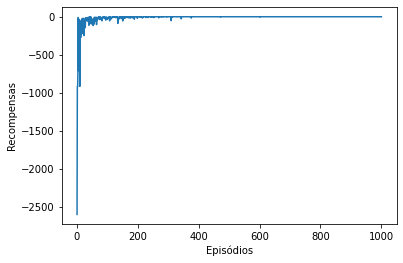

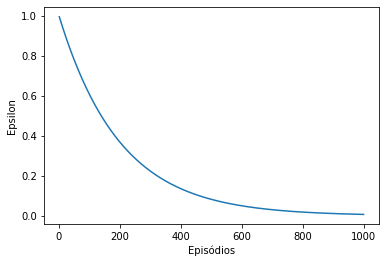

In [53]:
#%%Impressão dos dados do aprendizado
#fig = plt.figure(figsize=(20,8))
#impressão do total de recompensas por episódio    
plt.figure()
plt.plot(epcs,train_Reward)
plt.xlabel("Episódios"), plt.ylabel("Recompensas")
#plt.title('Total de recompensas em cada episódio')
plt.show()

#impressão do decaimento do epsilon por episódio
plt.figure()
plt.plot(epcs,Epsilon)
plt.xlabel("Episódios"), plt.ylabel("Epsilon")
#plt.title("Epsilon para cada episódio")
plt.show()

In [ ]:
train_Reward

In [30]:
rout_mapa(map_CD)

1

In [54]:
map_CD

{1: [25, 35], 2: [35, 35], 3: [20, 20], 4: [25, 25]}

In [51]:
truck_CD_total

1020

In [ ]:
Q

In [55]:
agent_truck

{1: [0, 0, 160, [4]],
 2: [0, 0, 120, [2]],
 3: [0, 0, 100, [1]],
 4: [0, 0, 160, [4]],
 5: [0, 0, 140, [3]],
 6: [0, 0, 120, [2]],
 7: [0, 0, 120, [2]],
 8: [0, 0, 100, [1]]}